In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [56]:
llama_data = {}
for i in range(5):
    llama_data[i] = pd.read_csv(f"data/{i}_shot_data.tsv", sep="\t", decimal=",", index_col=0)
    llama_data[i]["num_unique"] = llama_data[i].apply(lambda row: int(row["num_generated"] * row["unique_generated"]), axis=1)

In [57]:
llama_data[1]

,definition,examples,generated,evaluated_generated,num_generated,unique_generated,definition_overlap,examples_overlap,overlap,num_unique
10,"Die ""Negation:NEG_XgeschweigedennY-Konstruktio...","['Da merkt kein Mensch , dass wir alle das gle...","[""Da merkt kein Mensch , dass wir alle das gle...","['Da merkt kein Mensch , dass wir alle das gle...",1,1.000000,0.000000,0.2,0.200000,1
100,"Die ""Äquativ_Plural-Konstruktion"" gehört zu de...",['Bis auf wenige Millimeter sind die Geräte pr...,"[""Die Kaffeetasse mit dem Glas hat eine äquiva...",['Die Kaffeetasse mit dem Glas hat eine äquiva...,2,1.000000,0.125000,0.0,0.125000,2
1004,"Die ""Superlativ_Klimax:ADJ1_ADJ1-er_NP-Konstru...","['Hoch , höher , Spritpreis : Zurzeit wachsen ...","[""Größter"", ""Größter"", ""Der größte""]","['Größter', 'Größter', 'Der größte']",3,0.666667,0.000000,0.0,0.000000,2
1006,"Die ""Superlativ:PRÄP_ADJ-ster_NP-Konstruktion""...","['Sie erzählen , was sie bislang am häufigsten...","[""Sie hat das Konzert, das sie am häufigsten b...","['Sie hat das Konzert, das sie am häufigsten b...",1,1.000000,0.000000,0.0,0.000000,1
101,"Die ""Äquativ:ADJwieNP-Konstruktion"" gehört zu ...","['Er ist geprägt von Gewalt , und doch ist er ...","[""Er ist wie ein Baum im Wind"", ""Ein Mann wie ...","['Er ist wie ein Baum im Wind', 'Ein Mann wie ...",3,1.000000,0.000000,0.0,0.000000,3
...,...,...,...,...,...,...,...,...,...,...
97,"Die ""Komparativ:ADJ1-eralsADJ1-Konstruktion"" g...","['Hoffentlich naturweiss , denn weisser als we...","[""Du bist kreativ und gewissenhaft"", ""Du bist ...","['Du bist kreativ und gewissenhaft', 'Du bist ...",3,1.000000,0.333333,0.0,0.333333,3
973,"Bei ""Disjunktion_Doppeltitel:XoderY"" handelt e...",['Obelix und Asterix oder der Sport und die In...,"[""Das Mammut und die Dinosaurier oder das Lebe...",['Das Mammut und die Dinosaurier oder das Lebe...,3,1.000000,0.000000,0.0,0.000000,3
976,"Bei ""Korrelation_Affirmation:WoXist, istY"" han...","['"" Wo ein Wille ist , ist Umweltschutz . ""']","["" Wo ein Wille ist, ist Umweltschutz. ""]","[' Wo ein Wille ist, ist Umweltschutz. ']",1,1.000000,0.333333,0.0,0.333333,1
98,"Die ""Äquativ:soADJwieXP-Konstruktion"" gehört z...",['Die Anzahl der Jägerinnen ist in Deutschland...,"[""Die Sichtbarkeit im Tunnel war gleichwertig ...",['Die Sichtbarkeit im Tunnel war gleichwertig ...,3,1.000000,0.000000,0.0,0.000000,3


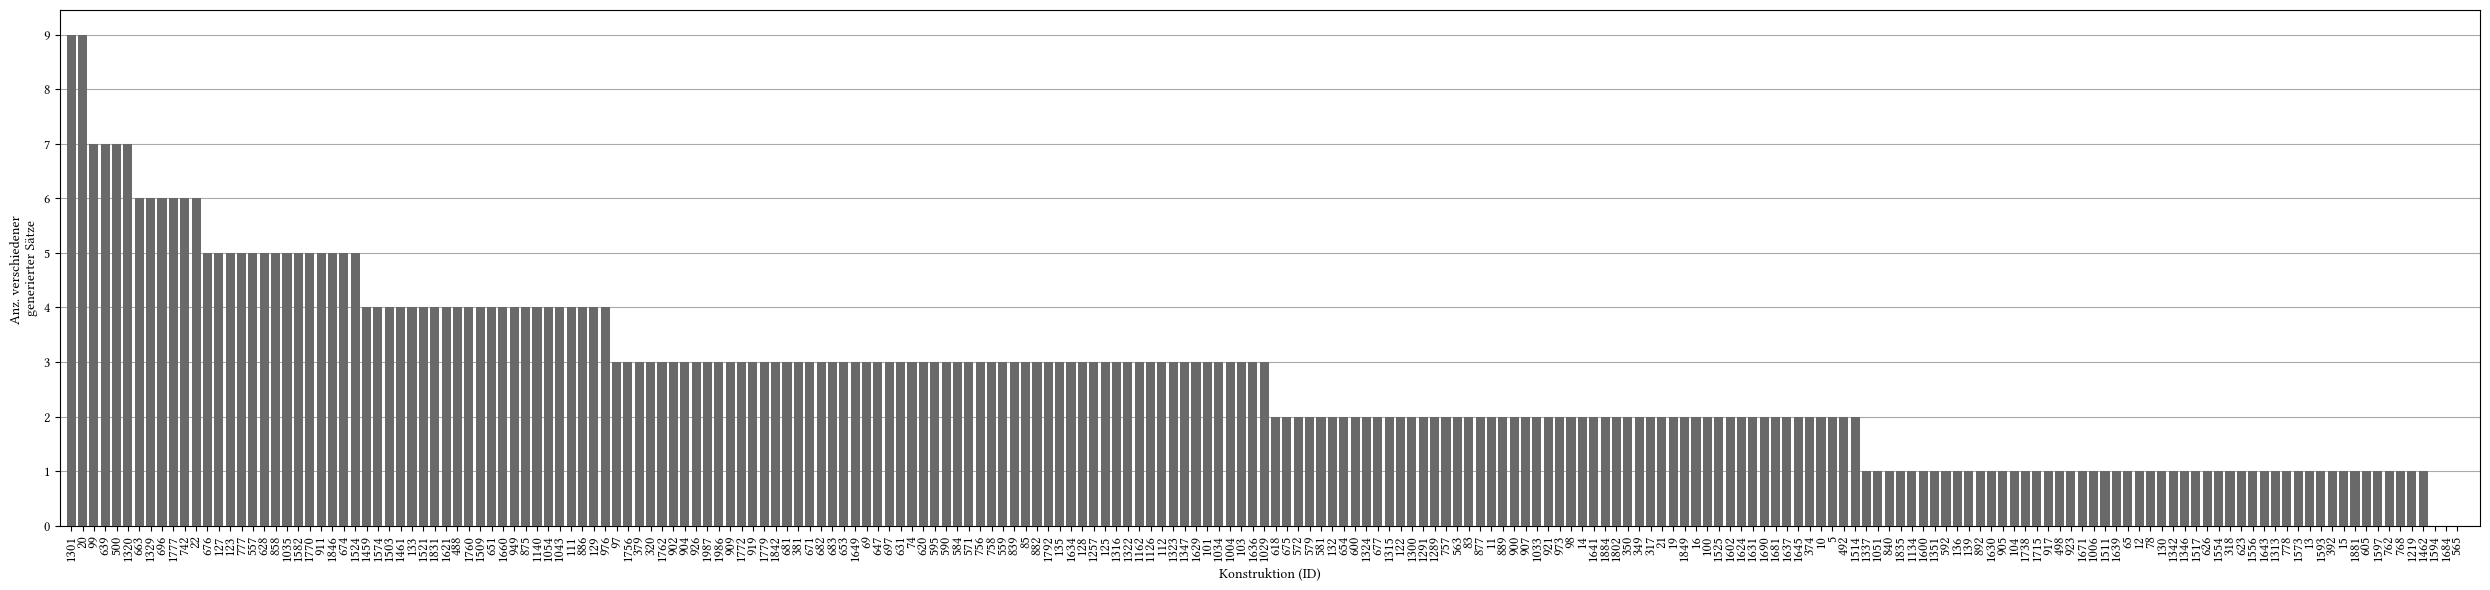

In [58]:
constr = {}
for i, data in llama_data.items():
    constr[i] = data["num_unique"]
sorted_constructions = constr[0].sort_values(ascending=False)

constr_strings = [str(i) for i in list(sorted_constructions.index)]
    
plt.rcParams['font.family'] = 'Libertinus Serif'
fig, ax = plt.subplots(figsize=(25, 6))

plt.bar(constr_strings, sorted_constructions.values, color='dimgrey', zorder=3)
    
plt.grid(which='major', axis='y', linestyle='-', color='darkgrey', zorder=0)

plt.xlabel('Konstruktion (ID)')
plt.ylabel('Anz. verschiedener \ngenerierter Sätze')
    
plt.xticks(rotation=90)
plt.yticks(np.arange(0, max(constr[0].values) + 1, 1))

plt.xlim(-1, len(constr_strings)+1)

plt.tight_layout()
    
plt.savefig(f'llama_unique_zero.pdf')
plt.show()

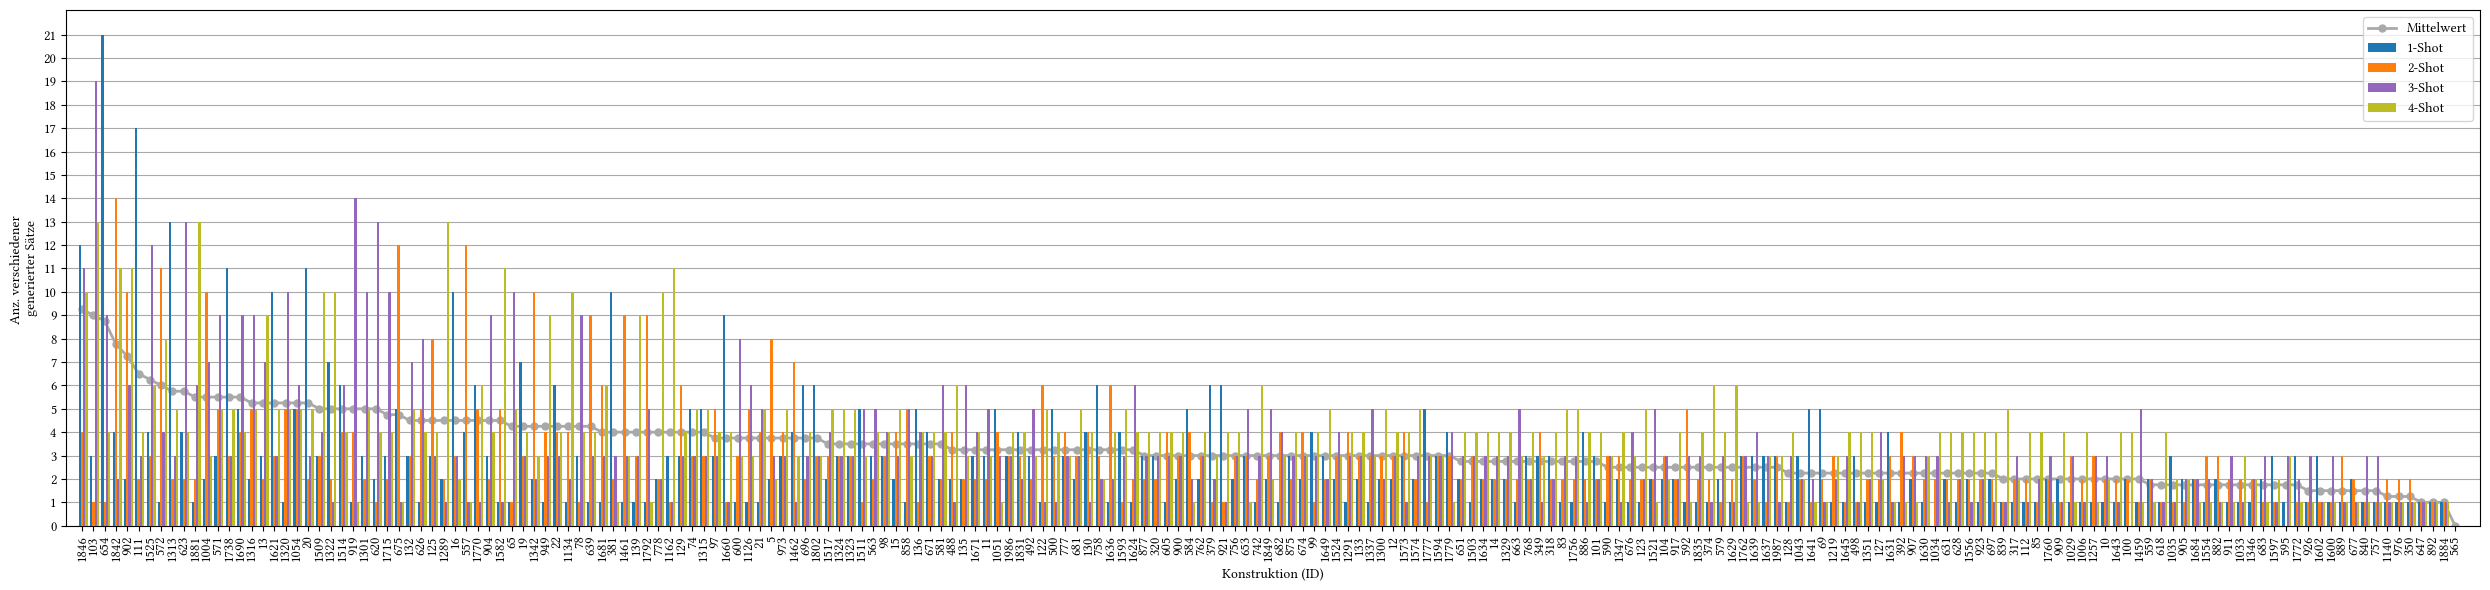

In [59]:
constr = {}
for i, data in llama_data.items():
    constr[i] = data["num_unique"]

average_values = pd.concat([constr[1], constr[2], constr[3], constr[4]], axis=1).mean(axis=1)
sorted_constructions = average_values.sort_values(ascending=False)

constr_strings = [str(i) for i in list(sorted_constructions.index)]
    
plt.rcParams['font.family'] = 'Libertinus Serif'
fig, ax = plt.subplots(figsize=(25, 6))
    
# Plot the grouped bars
bar_width = 0.2
bar_positions_1 = np.arange(len(constr_strings))
bar_positions_2 = bar_positions_1 + bar_width
bar_positions_3 = bar_positions_1 + 2 * bar_width
bar_positions_4 = bar_positions_1 + 3 * bar_width

ax.bar(bar_positions_1, constr[1][sorted_constructions.index], color='tab:blue', width=bar_width, zorder=4)
ax.bar(bar_positions_2, constr[2][sorted_constructions.index], color='tab:orange', width=bar_width, zorder=4)
ax.bar(bar_positions_3, constr[3][sorted_constructions.index], color='tab:purple', width=bar_width, zorder=4)
ax.bar(bar_positions_4, constr[4][sorted_constructions.index], color='tab:olive', width=bar_width, zorder=4)

plt.plot(bar_positions_1 + bar_width, average_values[sorted_constructions.index], color='darkgrey', marker='o', linestyle='-', linewidth=2, markersize=5)
    
plt.grid(which='major', axis='y', linestyle='-', color='darkgrey', zorder=0)

ax.legend(labels=['Mittelwert', '1-Shot', '2-Shot', '3-Shot', '4-Shot'])

plt.xlabel('Konstruktion (ID)')
plt.ylabel('Anz. verschiedener \ngenerierter Sätze')
    
plt.xticks(bar_positions_1 + bar_width, constr_strings, rotation=90)
plt.yticks(np.arange(0, max(constr[1].values) + 1, 1))

plt.xlim(bar_positions_1[0] - bar_width - 1, bar_positions_4[-1] + 4 * bar_width + 1)

plt.tight_layout()
    
plt.savefig(f'llama_unique_few.pdf')
plt.show()

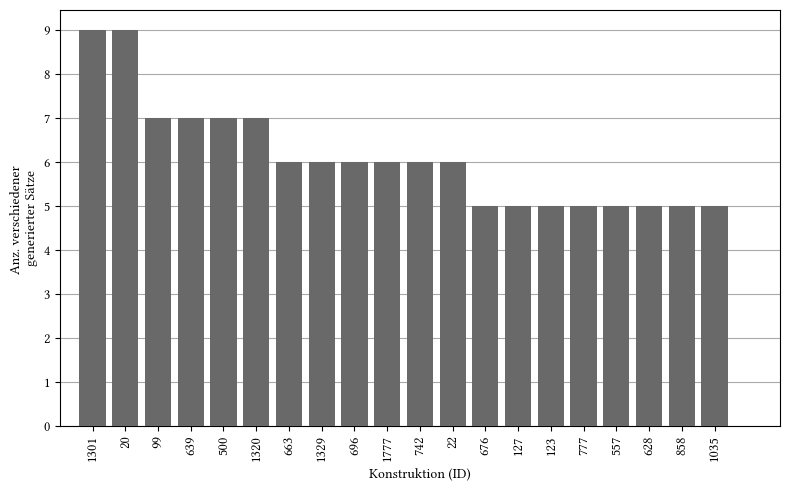

In [60]:
constr = {}
for i, data in llama_data.items():
    constr[i] = data["num_unique"]
sorted_constructions = constr[0].sort_values(ascending=False)

top_20_constructions = sorted_constructions.head(20)
constr_strings = [str(i) for i in list(top_20_constructions.index)]
    
plt.rcParams['font.family'] = 'Libertinus Serif'
fig, ax = plt.subplots(figsize=(8, 5))

plt.bar(constr_strings, top_20_constructions.values, color='dimgrey', zorder=3)
    
plt.grid(which='major', axis='y', linestyle='-', color='darkgrey', zorder=0)

plt.xlabel('Konstruktion (ID)')
plt.ylabel('Anz. verschiedener \ngenerierter Sätze')
    
plt.xticks(rotation=90)
plt.yticks(np.arange(0, max(constr[0].values) + 1, 1))

plt.xlim(-1, len(constr_strings)+1)

plt.tight_layout()
    
plt.savefig(f'llama_unique_zero_top20.pdf')
plt.show()

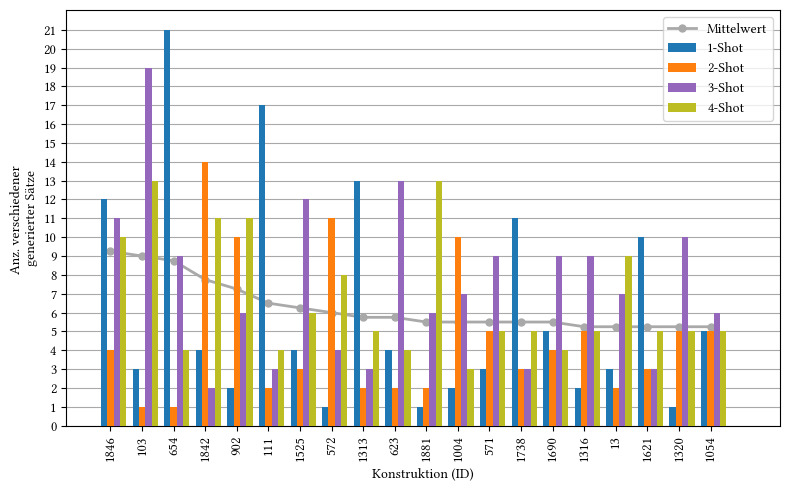

In [61]:
constr = {}
for i, data in llama_data.items():
    constr[i] = data["num_unique"]

average_values = pd.concat([constr[1], constr[2], constr[3], constr[4]], axis=1).mean(axis=1)
sorted_constructions = average_values.sort_values(ascending=False)

top_20_constructions = sorted_constructions.head(20)
constr_strings = [str(i) for i in list(top_20_constructions.index)]
    
plt.rcParams['font.family'] = 'Libertinus Serif'
fig, ax = plt.subplots(figsize=(8, 5))
    
# Plot the grouped bars
bar_width = 0.2
bar_positions_1 = np.arange(len(constr_strings))
bar_positions_2 = bar_positions_1 + bar_width
bar_positions_3 = bar_positions_1 + 2 * bar_width
bar_positions_4 = bar_positions_1 + 3 * bar_width

ax.bar(bar_positions_1, constr[1][top_20_constructions.index], color='tab:blue', width=bar_width, zorder=4)
ax.bar(bar_positions_2, constr[2][top_20_constructions.index], color='tab:orange', width=bar_width, zorder=4)
ax.bar(bar_positions_3, constr[3][top_20_constructions.index], color='tab:purple', width=bar_width, zorder=4)
ax.bar(bar_positions_4, constr[4][top_20_constructions.index], color='tab:olive', width=bar_width, zorder=4)

plt.plot(bar_positions_1 + bar_width, average_values[top_20_constructions.index], color='darkgrey', marker='o', linestyle='-', linewidth=2, markersize=5)
    
plt.grid(which='major', axis='y', linestyle='-', color='darkgrey', zorder=0)

ax.legend(labels=['Mittelwert', '1-Shot', '2-Shot', '3-Shot', '4-Shot'])

plt.xlabel('Konstruktion (ID)')
plt.ylabel('Anz. verschiedener \ngenerierter Sätze')
    
plt.xticks(bar_positions_1 + bar_width, constr_strings, rotation=90)
plt.yticks(np.arange(0, max(constr[1].values) + 1, 1))

plt.xlim(bar_positions_1[0] - bar_width - 1, bar_positions_4[-1] + 4 * bar_width + 1)

plt.tight_layout()
    
plt.savefig(f'llama_unique_few_top20.pdf')
plt.show()

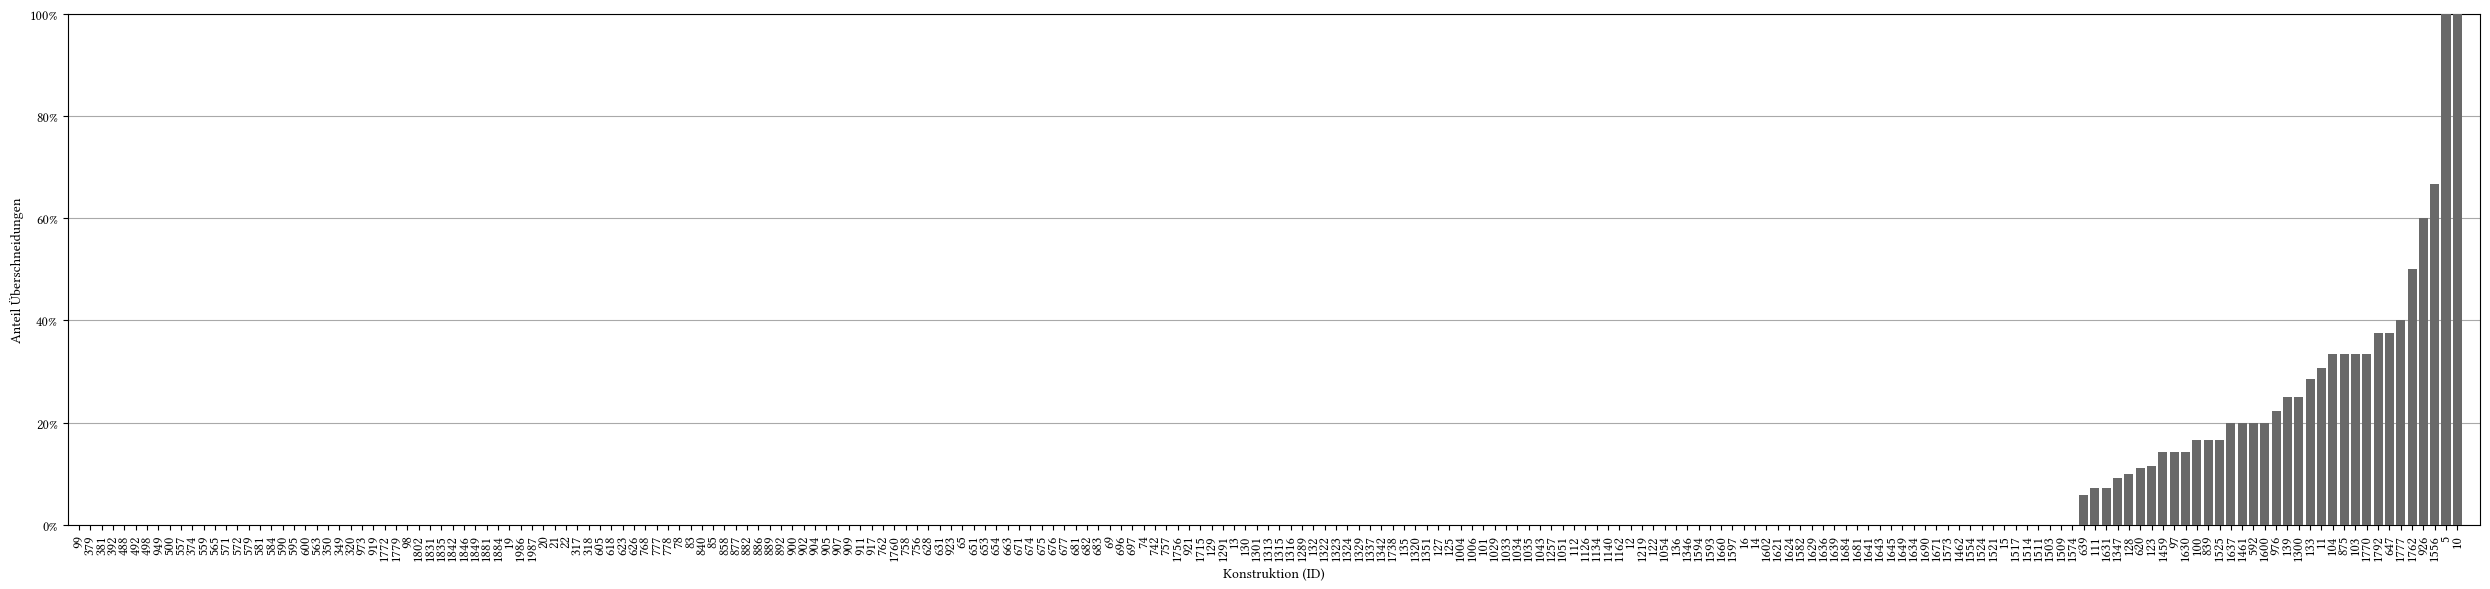

In [62]:
constr = {}
for i, data in llama_data.items():
    constr[i] = data["overlap"]
sorted_constructions = constr[0].sort_values(ascending=True)

constr_strings = [str(i) for i in list(sorted_constructions.index)]
    
plt.rcParams['font.family'] = 'Libertinus Serif'
fig, ax = plt.subplots(figsize=(25, 6))

plt.bar(constr_strings, sorted_constructions.values, color='dimgrey', zorder=3)
    
plt.grid(which='major', axis='y', linestyle='-', color='darkgrey', zorder=0)

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.xlabel('Konstruktion (ID)')
plt.ylabel('Anteil Überschneidungen')
    
plt.xticks(rotation=90)

plt.ylim(0, 1)
plt.xlim(-1, len(constr_strings)+1)

plt.tight_layout()
    
plt.savefig(f'llama_overlap_zero.pdf')
plt.show()

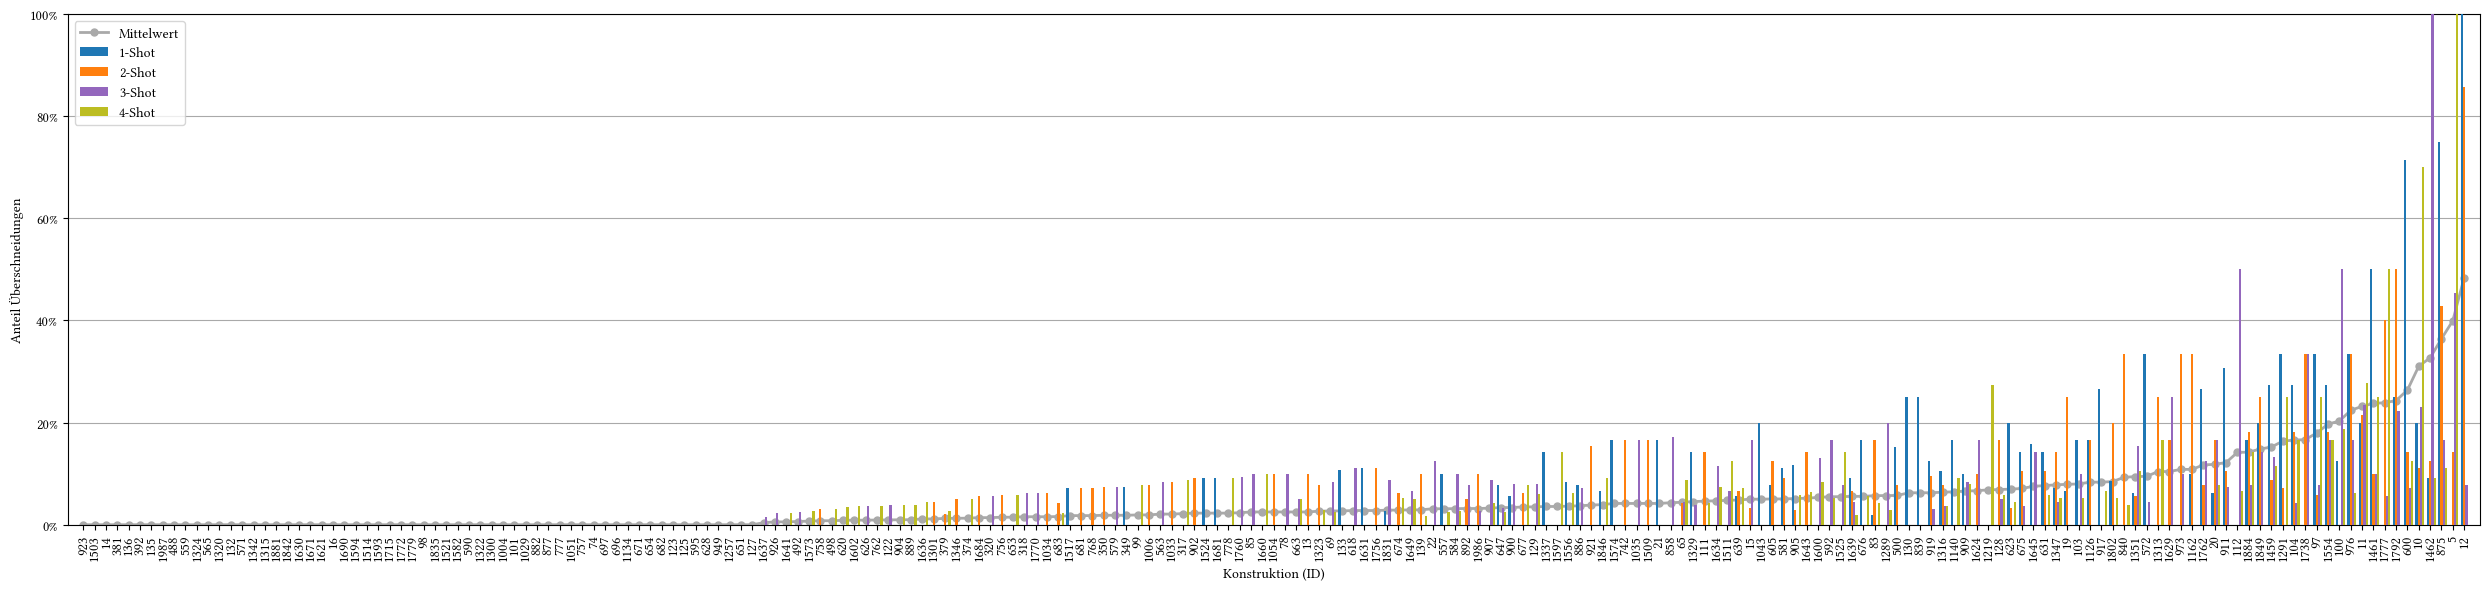

In [63]:
constr = {}
for i, data in llama_data.items():
    constr[i] = data["overlap"]

average_values = pd.concat([constr[1], constr[2], constr[3], constr[4]], axis=1).mean(axis=1)
sorted_constructions = average_values.sort_values(ascending=True)

constr_strings = [str(i) for i in list(sorted_constructions.index)]
    
plt.rcParams['font.family'] = 'Libertinus Serif'
fig, ax = plt.subplots(figsize=(25, 6))
    
# Plot the grouped bars
bar_width = 0.2
bar_positions_1 = np.arange(len(constr_strings))
bar_positions_2 = bar_positions_1 + bar_width
bar_positions_3 = bar_positions_1 + 2 * bar_width
bar_positions_4 = bar_positions_1 + 3 * bar_width

ax.bar(bar_positions_1, constr[1][sorted_constructions.index], color='tab:blue', width=bar_width, zorder=4)
ax.bar(bar_positions_2, constr[2][sorted_constructions.index], color='tab:orange', width=bar_width, zorder=4)
ax.bar(bar_positions_3, constr[3][sorted_constructions.index], color='tab:purple', width=bar_width, zorder=4)
ax.bar(bar_positions_4, constr[4][sorted_constructions.index], color='tab:olive', width=bar_width, zorder=4)

plt.plot(bar_positions_1 + bar_width, average_values[sorted_constructions.index], color='darkgrey', marker='o', linestyle='-', linewidth=2, markersize=5)
    
plt.grid(which='major', axis='y', linestyle='-', color='darkgrey', zorder=0)

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

ax.legend(labels=['Mittelwert', '1-Shot', '2-Shot', '3-Shot', '4-Shot'])

plt.xlabel('Konstruktion (ID)')
plt.ylabel('Anteil Überschneidungen')
    
plt.xticks(bar_positions_1 + bar_width, constr_strings, rotation=90)

plt.ylim(0, 1)
plt.xlim(bar_positions_1[0] - bar_width - 1, bar_positions_2[-1] + 2 * bar_width + 1)

plt.tight_layout()
    
plt.savefig(f'llama_overlap_few.pdf')
plt.show()

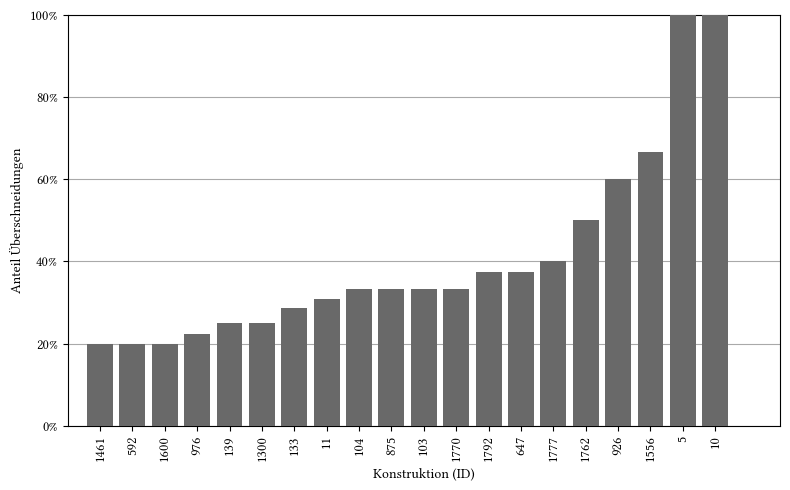

In [64]:
constr = {}
for i, data in llama_data.items():
    constr[i] = data["overlap"]
sorted_constructions = constr[0].sort_values(ascending=True)

flop_20_constructions = sorted_constructions.tail(20)
constr_strings = [str(i) for i in list(flop_20_constructions.index)]
    
plt.rcParams['font.family'] = 'Libertinus Serif'
fig, ax = plt.subplots(figsize=(8, 5))

plt.bar(constr_strings, flop_20_constructions.values, color='dimgrey', zorder=3)

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))    

plt.grid(which='major', axis='y', linestyle='-', color='darkgrey', zorder=0)

plt.xlabel('Konstruktion (ID)')
plt.ylabel('Anteil Überschneidungen')
    
plt.xticks(rotation=90)

plt.ylim(0, 1)
plt.xlim(-1, len(constr_strings)+1)

plt.tight_layout()
    
plt.savefig(f'llama_overlap_zero_flop20.pdf')
plt.show()

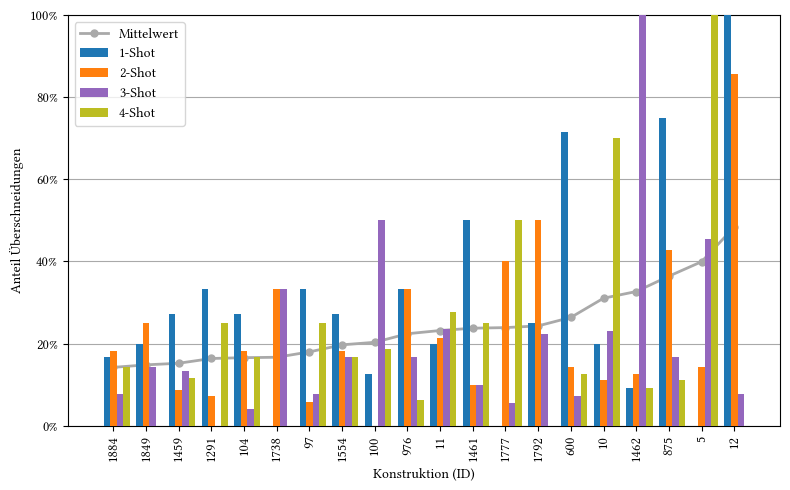

In [65]:
constr = {}
for i, data in llama_data.items():
    constr[i] = data["overlap"]

average_values = pd.concat([constr[1], constr[2], constr[3], constr[4]], axis=1).mean(axis=1)
sorted_constructions = average_values.sort_values(ascending=True)

flop_20_constructions = sorted_constructions.tail(20)
constr_strings = [str(i) for i in list(flop_20_constructions.index)]

plt.rcParams['font.family'] = 'Libertinus Serif'
fig, ax = plt.subplots(figsize=(8, 5))
    
# Plot the grouped bars
bar_width = 0.2
bar_positions_1 = np.arange(len(constr_strings))
bar_positions_2 = bar_positions_1 + bar_width
bar_positions_3 = bar_positions_1 + 2 * bar_width
bar_positions_4 = bar_positions_1 + 3 * bar_width

ax.bar(bar_positions_1, constr[1][flop_20_constructions.index], color='tab:blue', width=bar_width, zorder=4)
ax.bar(bar_positions_2, constr[2][flop_20_constructions.index], color='tab:orange', width=bar_width, zorder=4)
ax.bar(bar_positions_3, constr[3][flop_20_constructions.index], color='tab:purple', width=bar_width, zorder=4)
ax.bar(bar_positions_4, constr[4][flop_20_constructions.index], color='tab:olive', width=bar_width, zorder=4)

plt.plot(bar_positions_1 + bar_width, average_values[flop_20_constructions.index], color='darkgrey', marker='o', linestyle='-', linewidth=2, markersize=5)
    
plt.grid(which='major', axis='y', linestyle='-', color='darkgrey', zorder=0)

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

ax.legend(labels=['Mittelwert', '1-Shot', '2-Shot', '3-Shot', '4-Shot'])

plt.xlabel('Konstruktion (ID)')
plt.ylabel('Anteil Überschneidungen')
    
plt.xticks(bar_positions_1 + bar_width, constr_strings, rotation=90)

plt.ylim(0, 1)
plt.xlim(bar_positions_1[0] - bar_width - 1, bar_positions_2[-1] + 2 * bar_width + 1)

plt.tight_layout()
    
plt.savefig(f'llama_overlap_few_flop20.pdf')
plt.show()